## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## loaing dataset

In [2]:
df = pd.read_csv('Amazon Sale Report.csv', encoding = 'unicode_escape')

In [5]:
df.shape

(128976, 21)

In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [11]:
df.drop(['New','PendingS'],axis = 1 , inplace = True)

In [13]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [15]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum ()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [19]:
df.shape

(37514, 19)

In [21]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  ship-cou

In [25]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [27]:
df['ship-postal-code'].dtype

dtype('int32')

In [43]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


ValueError: time data "04-30-22" doesn't match format "%m/%d/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [45]:
print(df['Date'].unique())


['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-2022' '04-11-2022' '04-10-2022' '04-09-2022' '04-08-2022'
 '04-07-2022' '04-06-2022' '04-05-2022' '04-04-2022' '04-03-2022'
 '04-02-2022' '04-01-2022' '03-31-22' '05-31-22' '05-30-22' '05-29-22'
 '05-28-22' '05-27-22' '05-26-22' '05-25-22' '05-24-22' '05-23-22'
 '05-22-22' '05-21-22' '05-20-22' '05-19-22' '05-18-22' '05-17-22'
 '05-16-22' '05-15-22' '05-14-22' '05-13-22' '05-12-2022' '05-11-2022'
 '05-10-2022' '05-09-2022' '05-08-2022' '05-07-2022' '05-06-2022'
 '05-05-2022' '05-04-2022' '05-03-2022' '05-02-2022' '05-01-2022'
 '06-29-22' '06-28-22' '06-27-22' '06-26-22' '06-25-22' '06-24-22'
 '06-23-22' '06-22-22' '06-21-22' '06-20-22' '06-19-22' '06-18-22'
 '06-17-22' '06-16-22' '06-15-22' '06-14-22' '06-13-22' '06-12-2022'
 '06-11-2022' '06-10-2022' '06-09-2022' '06-08-2022' '06

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [31]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [33]:
df.rename(columns = {'Qty':'Quantity'}, inplace = True)

In [35]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


## Exploratory data analysis

In [38]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

## Analyzing by size

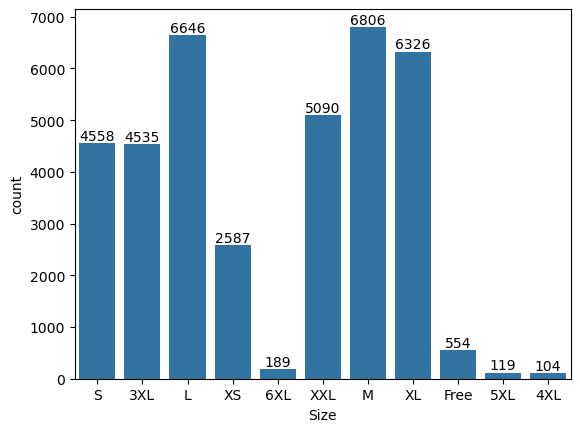

In [53]:
ax = sns.countplot(x = 'Size', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graph it can be seen most ordered size is M size*

In [66]:
size_qty= df.groupby('Size', as_index = False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)

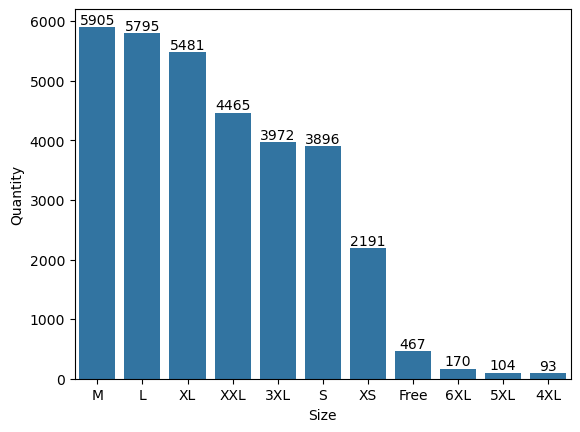

In [81]:
ax = sns.barplot(x = 'Size', y = 'Quantity', data = size_qty)
for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph it can be seen that most of the quantity buys M-size in sales*

## Coutier Status

<Axes: xlabel='Courier Status', ylabel='count'>

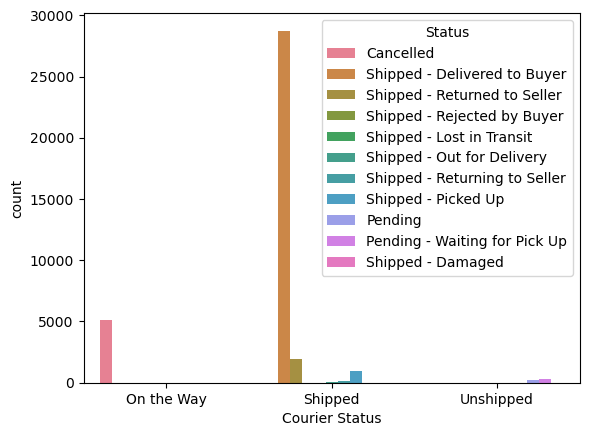

In [87]:
sns.countplot(x='Courier Status', hue = 'Status', data = df)

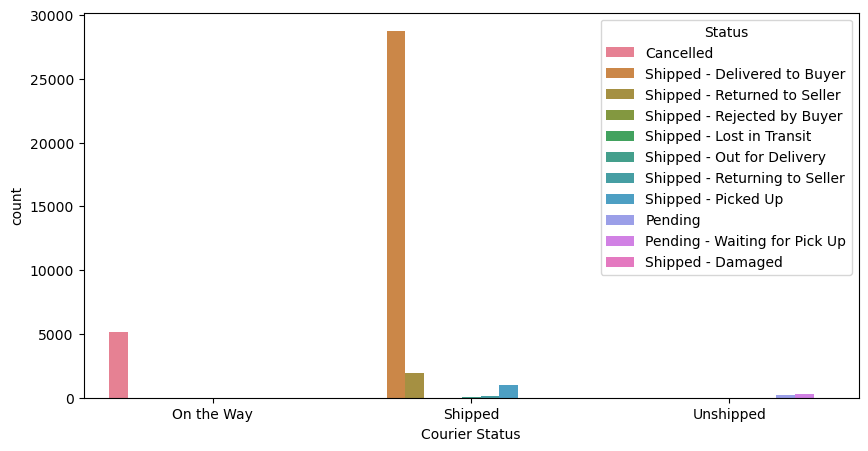

In [95]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='Courier Status', hue = 'Status', data = df)
plt.show()


*Above graph shows taht majority of the orders are shipped through courier*

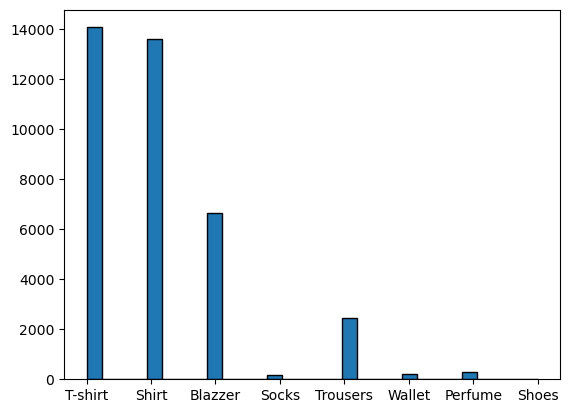

In [101]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.hist(column_data, bins = 30 , edgecolor= 'Black')
plt.show()

In [103]:
column_data.unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Socks', 'Trousers', 'Wallet',
       'Perfume', 'Shoes'], dtype=object)

*From the above graph it can be seen hat most item sold is T-shirt*

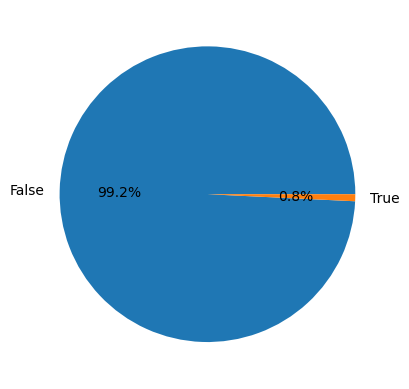

In [112]:
B2B_Check = df['B2B'].value_counts()

plt.pie(B2B_Check, labels =B2B_Check.index , autopct = '%1.1f%%')
plt.show()

*Frome the above graph we can see that maximum buyers are retailers*

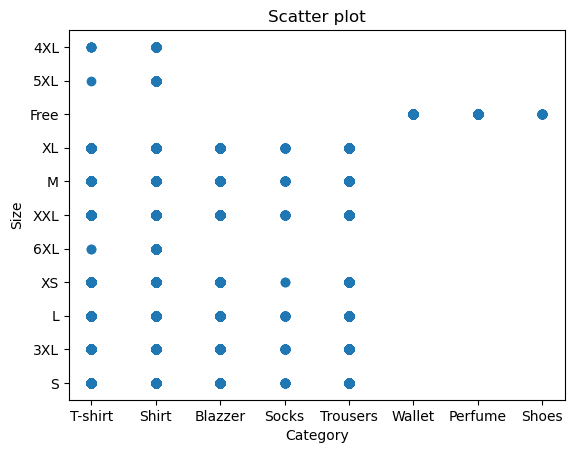

In [115]:
x_data = df['Category']
y_data = df['Size']

plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter plot')
plt.show()

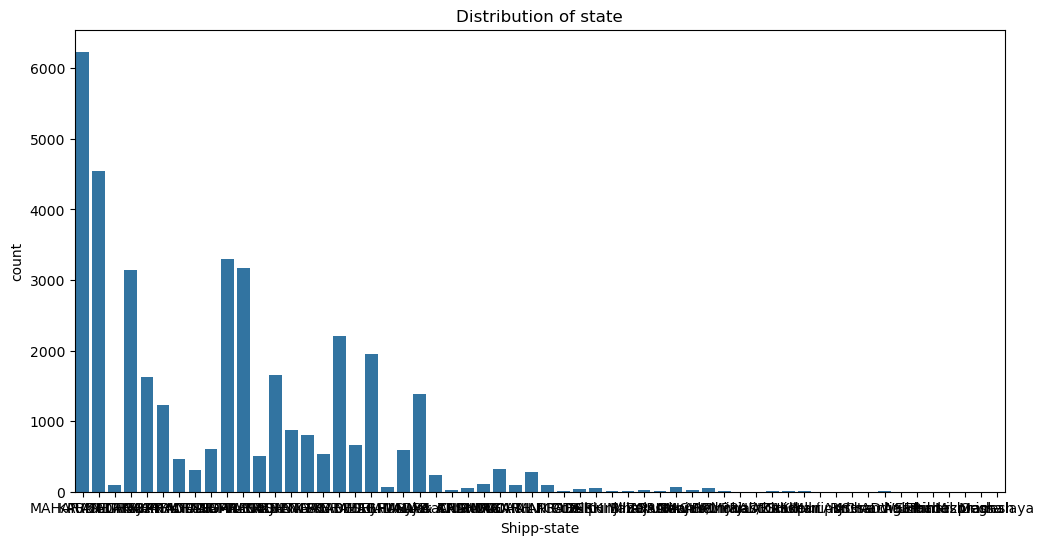

In [125]:
plt.figure(figsize = (12,6))
sns.countplot(data = df , x = 'ship-state')
plt.xlabel('Shipp-state')
plt.ylabel('count')
plt.title( 'Distribution of state')
plt.show()

In [ ]:
top_10_states = df['ship-state'].value_counts().head(10)

plt.figure(figsize = (12,6))
sns.countplot(data = df[df['ship-state'].isin(top_10_states.index)],  x = 'ship-state')
plt.xlabel('Shipp-state')
plt.ylabel('count')
plt.title( 'Distribution of state')
plt.xticks(rotation = 45)
plt.show()